### Домашняя работа 2.
### Логистическая регрессия. Работа с признаками


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов. Можно получить 4.5 бонусных балла.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
print('Всем удачи!👒 Тут она точно пригодится.')

Всем удачи!👒 Тут она точно пригодится.


In [2]:
%matplotlib inline
import matplotlib as plt
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Часть 1. Логистическая регрессия своими руками (4 балла)

Реализуйте логистическую регрессию, обучаемую с помощью:

**Задание 1 (1.5 балла). Градиентного спуска**

**Задание 2 (1.5 балла). Стохастического градиентного спуска**

Во всех пунктах необходимо соблюдать следующие условия:
- Градиентный спуск необходимо записать в векторном виде
- Циклы средствами python допускается использовать только для итераций градиентного спуска;
- В качестве критерия останова необходимо использовать (одновременно):

        проверку на евклидову норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) задаваемого параметром `tolerance`;


        достижение максимального числа итераций (например, 10000), задаваемого параметром `max_iter`.

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса loss_history. В нём после вызова метода fit должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту);

Инициализировать веса можно случайным образом или нулевым вектором.

Полезно [почитать](https://scikit-learn.org/stable/developers/develop.html).

In [3]:
import numpy as np
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type='stochastic',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) — init weights
        eta: learning rate
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        #self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration

    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        self.loss_history = []
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        if self.w0 is None:
            self.w0 = np.zeros_like(X[1])
        self.w = self.w0.copy()

        for _ in range(self.max_iter):
            grad = self.calc_gradient(X, y)
            self.w = self.w - grad * self.eta
            loss = self.calc_loss(X, y)
            self.loss_history.append(loss)

            if np.linalg.norm(self.eta * grad) < self.tolerance:
                break

        return self


    def predict_proba(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return 1 / (1 + np.exp(-np.dot(X, self.w)))


    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return np.round(self.predict_proba(X))

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

        if self.gd_type == 'full':
            predictions = self.predict_proba(X)
            error = y - predictions
            grad = -np.dot(X.T, error) / len(y)

        else:
            ind = np.random.choice(X.shape[0], size=1)
            predictions = self.predict_proba(X[ind])
            errors = y[ind] - predictions
            grad = -np.dot(X[ind].T, errors) / len(y[ind])

        return grad

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float
        """
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        epsilon = 1e-15
        predictions = self.predict_proba(X)
        loss = -np.mean(y * np.log(predictions + epsilon) + (1 - y) * np.log(1 - predictions + epsilon))
        
        return loss

Синтетические данные

In [4]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Важно:** далее предполагается, что вы используете собственную реализацию логистической регрессии.
Если с написанием класса возникли проблемы, используйте реализацию sklearn, чтобы не терять баллы за остальные задания.

**Задание 3 (1 балл)**

Обучите логистическую регрессию на синтетических данных.

In [6]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import time
logreg_full = LogReg(gd_type='full', max_iter=1000, tolerance=1e-6, eta=0.01)

start_time = time.time()
logreg_full.fit(X_train, y_train)
end_time = time.time()
grad_descent_time = end_time - start_time

y_pred_full = logreg_full.predict(X_test)
accuracy_full = np.mean(y_pred_full == y_test)

print(f"Точность модели, использующей градиентный спуск на тестовом датасете: {accuracy_full:.3f}")
print(f"Время выполнения градиентного спуска: {grad_descent_time:.4f} секунд.")

Точность модели, использующей градиентный спуск на тестовом датасете: 0.849
Время выполнения градиентного спуска: 2.0352 секунд.


In [7]:
logreg_stoch = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-6, eta=0.01)

start_time = time.time()
logreg_stoch.fit(X_train, y_train)
end_time = time.time()
stoch_grad_time = end_time - start_time

y_pred_stoch = logreg_stoch.predict(X_test)
accuracy_stoch = np.mean(y_pred_stoch == y_test)

print(f"Точность модели, использующей cтохастический градиентный спуск на тестовом датасете: {accuracy_stoch:.3f}")
print(f"Время выполнения Стохастического градиентного спуска: {stoch_grad_time:.4f} сек.")

Точность модели, использующей cтохастический градиентный спуск на тестовом датасете: 0.838
Время выполнения Стохастического градиентного спуска: 1.3800 сек.


На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые. Проинтерпретируйте результат.

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

# Вероятность принадлежности к классу 1
y_prob_full = logreg_full.predict_proba(X_test)
y_prob_stoch = logreg_stoch.predict_proba(X_test)

# ROC-AUC
roc_auc_full = roc_auc_score(y_test, y_prob_full)
roc_auc_stoch = roc_auc_score(y_test, y_prob_stoch)
print(f"ROC-AUC (Градиентный спуск): {roc_auc_full:.2f}")
print(f"ROC-AUC (Стохастический градиентный спуск): {roc_auc_stoch:.2f}")
print (('*') * 50)

# PR-AUC
precision_full, recall_full, _ = precision_recall_curve(y_test, y_prob_full)
precision_stoch, recall_stoch, _ = precision_recall_curve(y_test, y_prob_stoch)

pr_auc_full = auc(recall_full, precision_full)
pr_auc_stoch = auc(recall_stoch, precision_stoch)


print(f"PR-AUC (Градиентный спуск): {pr_auc_full:.2f}")
print(f"PR-AUC (Стохастический градиентный спуск): {pr_auc_stoch:.2f}")

ROC-AUC (Градиентный спуск): 0.93
ROC-AUC (Стохастический градиентный спуск): 0.92
**************************************************
PR-AUC (Градиентный спуск): 0.92
PR-AUC (Стохастический градиентный спуск): 0.92


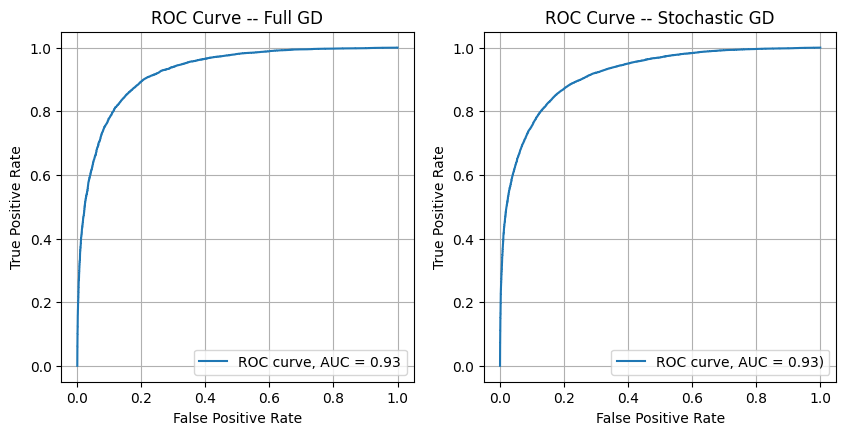

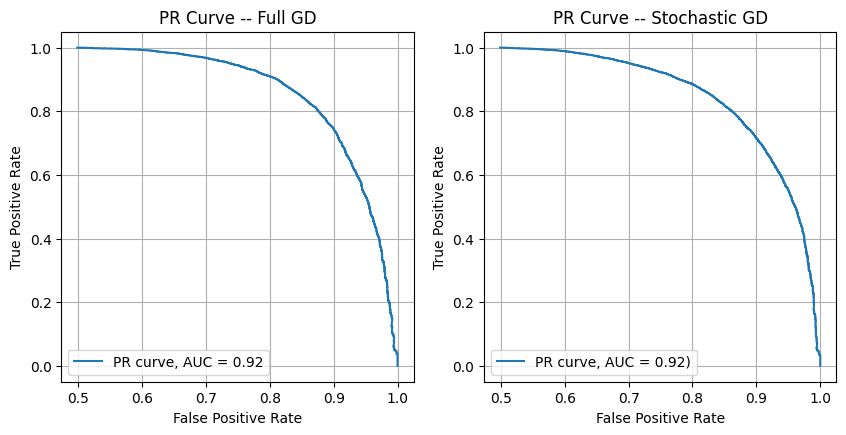

In [9]:
# Построение ROC кривой для градиентного спуска
plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)
fpr_full, tpr_full, _ = roc_curve(y_test, y_prob_full)
plt.plot(fpr_full, tpr_full, label=f'ROC curve, AUC = {roc_auc_full:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.title('ROC Curve -- Full GD')
plt.legend()

plt.subplot(2, 2, 2)
fpr_stoch, tpr_stoch, _ = roc_curve(y_test, y_prob_stoch)
plt.plot(fpr_stoch, tpr_stoch, label=f'ROC curve, AUC = {roc_auc_full:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.title('ROC Curve -- Stochastic GD')
plt.legend()

# Построение PR кривой для градиентного спуска
plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 3)
plt.plot(precision_full, recall_full, label=f'PR curve, AUC = {pr_auc_full:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.title('PR Curve -- Full GD')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(precision_stoch, recall_stoch, label=f'PR curve, AUC = {pr_auc_stoch:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.title('PR Curve -- Stochastic GD')
plt.legend()

Полный градиентный спуск вычисляет градиент заданной функции потерь по параметрам модели для всего набора данных.
Алгоритм градиентного спуска высчитывает очередное приближение в направлении антиградиента с некоторым шагом,
на который влияет коэффициент пропорциональности, или скорость обучения, пока не будет достигнут критерий останова.
Такой метод максимально точный, но очень ресурсоемкий. 

$$  x_{k+1} = x_k − \alpha \cdot \nabla_f(x_k)  $$

Cтохастический градиентный спуск -- это вариант градиентного спуска,
где для вычисления градиента на каждой итерации используется только часть данных для каждого обновления весов.
Как видно по результатам выше, он требует гораздо меньше времени для нахождения минимума и при подобранных параметрах, таких как размер батча и скорость обучения (и толике удачи), сходится в ту же точку, что и обычный градиентный спуск.

$$  x_{k+1} = x_k − \alpha \cdot g_k  $$

где $ g_k $ - стохастический градиент.

## Часть 2. Работа с категориальными переменными (3 балла)

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет.

In [79]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [11]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [12]:
X_train

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
1049183,0,1,5,0,0,1,0,0,0,0,...,4,3,4,6,0,0,0,0,0,0
106872,1,1,3,1,0,0,1,0,0,0,...,9,0,4,12,0,1,1,0,0,0
28943,6,2,7,1,0,0,0,1,0,0,...,4,1,2,7,0,1,1,0,1,0
851826,1,1,5,1,0,0,0,1,0,0,...,6,2,2,10,0,0,1,0,0,0
934813,0,1,1,0,4,1,0,0,0,0,...,9,1,2,14,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624097,3,1,5,0,0,0,1,0,0,0,...,9,1,0,5,1,1,1,0,1,0
697975,0,2,1,1,0,1,0,0,0,0,...,6,0,2,7,0,1,0,0,1,0
723907,5,1,3,1,0,0,1,0,0,0,...,6,2,1,7,0,0,0,1,0,0


In [13]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

**Задание 5 (0 баллов).** Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from tqdm import tqdm

time_gd = []
roc_auc_scores_gd = []

# Возьмем лишь 10 итераций, так как GD считается довольно долго
for i in tqdm(range(10)):
    # Создаем модель с GD
    logreg_gd = LogReg(gd_type='full', max_iter=1000, tolerance=1e-6, eta=0.01)

    start_time = time.time()
    logreg_gd.fit(X_train, y_train)
    end_time = time.time()
    sgd_time = end_time - start_time
    time_gd.append(sgd_time)

    # Вычисляем ROC-AUC на тесте
    y_prob_gd = logreg_gd.predict_proba(X_test)
    roc_auc_gd = roc_auc_score(y_test, y_prob_gd)
    roc_auc_scores_gd.append(roc_auc_gd)

# Усредняем
average_time_gd = sum(time_gd) / len(time_gd)
average_roc_auc_gd = sum(roc_auc_scores_gd) / len(roc_auc_scores_gd)

print(f"GD ROC-AUC: {average_roc_auc_gd:.3f}")
print(f"Среднее время выполнения LogReg с градиентным спуском: {average_time_gd:.3f} секунд")

100%|██████████| 10/10 [01:02<00:00,  6.25s/it]

GD ROC-AUC: 0.559
Среднее время выполнения LogReg с градиентным спуском: 6.230 секунд


In [15]:
time_sgd = []
roc_auc_scores_sgd = []

# С SGD, напротив, можно разгуляться :)
for i in tqdm(range(1000)):
    # Создаем модель с SGD
    logreg_sgd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-6, eta=0.01)

    start_time = time.time()
    logreg_sgd.fit(X_train, y_train)
    end_time = time.time()
    sgd_time = end_time - start_time
    time_sgd.append(sgd_time)

    # Вычисляем ROC-AUC на тесте
    y_prob_sgd = logreg_sgd.predict_proba(X_test)
    roc_auc_sgd = roc_auc_score(y_test, y_prob_sgd)
    roc_auc_scores_sgd.append(roc_auc_sgd)

# Усредняем
average_time_sgd = sum(time_sgd) / len(time_sgd)
average_roc_auc_sgd = sum(roc_auc_scores_sgd) / len(roc_auc_scores_sgd)

print(f"SGD ROC-AUC: {average_roc_auc_sgd:.3f}")
print(f"Среднее время выполнения LogReg со стохастическим градиентным спуском: {average_time_sgd:.3f} секунд")

100%|██████████| 1000/1000 [00:36<00:00, 27.69it/s]

SGD ROC-AUC: 0.498
Среднее время выполнения LogReg со стохастическим градиентным спуском: 0.015 секунд


**Задание 6 (0.5 балла).** Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [81]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [82]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder

cat_columns = ['ps_ind_02_cat', 'ps_ind_04_cat',
                'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat',
                'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
                'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
                'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']

enc = OneHotEncoder(drop='first')
encoded_train = enc.fit_transform(X_train[cat_columns]).toarray()
encoded_train = pd.DataFrame(encoded_train, columns=enc.get_feature_names_out())
X_train = pd.concat([X_train, encoded_train], axis=1).drop(columns=cat_columns)

X_train

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,0,6,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,6,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,3,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297601,1,4,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297602,5,2,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297603,0,5,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297604,0,8,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
encoded_test = enc.transform(X_test[cat_columns]).toarray()
encoded_test = pd.DataFrame(encoded_test, columns=enc.get_feature_names_out())
X_test = pd.concat([X_test, encoded_test], axis=1).drop(columns=cat_columns)
X_test

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,0,3,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,8,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,7,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297601,0,2,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297602,1,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297603,4,8,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
297604,1,4,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Такое количество признаков считается кратно дольше, поэтому поднимем скорость обучения на порядок

In [21]:
from tqdm import tqdm

time_gd = []
roc_auc_scores_gd = []

for i in tqdm(range(10)):
    # Создаем модель с GD
    logreg_gd = LogReg(gd_type='full', max_iter=1000, tolerance=1e-6, eta=0.1)

    start_time = time.time()
    logreg_gd.fit(X_train, y_train)
    end_time = time.time()
    sgd_time = end_time - start_time
    time_gd.append(sgd_time)

    # Вычисляем ROC-AUC
    y_prob_gd = logreg_gd.predict_proba(X_test)
    roc_auc_gd = roc_auc_score(y_test, y_prob_gd)
    roc_auc_scores_gd.append(roc_auc_gd)

# Усредняем
average_time_gd = sum(time_gd) / len(time_gd)
average_roc_auc_gd = sum(roc_auc_scores_gd) / len(roc_auc_scores_gd)

print(f"GD ROC-AUC: {average_roc_auc_gd:.3f}")
print(f"Среднее время выполнения LogReg с градиентным спуском: {average_time_gd:.3f} секунд")

100%|██████████| 10/10 [03:06<00:00, 18.69s/it]

GD ROC-AUC: 0.614
Среднее время выполнения LogReg с градиентным спуском: 18.662 секунд


In [85]:
time_sgd = []
roc_auc_scores_sgd = []

for i in tqdm(range(100)):
    # Создаем модель с SGD
    logreg_sgd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-6, eta=0.1)

    start_time = time.time()
    logreg_sgd.fit(X_train, y_train)
    end_time = time.time()
    sgd_time = end_time - start_time
    time_sgd.append(sgd_time)

    # Вычисляем ROC-AUC
    y_prob_sgd = logreg_sgd.predict_proba(X_test)
    roc_auc_sgd = roc_auc_score(y_test, y_prob_sgd)
    roc_auc_scores_sgd.append(roc_auc_sgd)

# Усредняем
average_time_sgd = sum(time_sgd) / len(time_sgd)
average_roc_auc_sgd = sum(roc_auc_scores_sgd) / len(roc_auc_scores_sgd)

print(f"SGD ROC-AUC: {average_roc_auc_sgd:.3f}")
print(f"Среднее время выполнения LogReg со стохастическим градиентным спуском: {average_time_sgd:.3f} секунд")

100%|██████████| 100/100 [00:13<00:00,  7.39it/s]

SGD ROC-AUC: 0.507
Среднее время выполнения LogReg со стохастическим градиентным спуском: 0.056 секунд


Как можно было заменить, one-hot-кодирование сильно увилечивает количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 7 (1.5 балла).__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше, без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментом. Заметили ли вы что-то интересное?


In [86]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,1,1,5,0,0,0,0,1,0,0,...,2,0,4,9,0,0,1,0,0,0
1,0,1,6,0,0,0,0,0,1,0,...,6,2,3,3,0,0,1,0,1,0
2,2,2,1,1,-1,0,1,0,0,0,...,7,3,2,5,0,1,0,0,0,0
3,1,3,10,0,0,0,0,1,0,0,...,9,1,3,5,0,0,1,0,0,1
4,2,1,1,1,0,0,0,1,0,0,...,4,1,4,7,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297601,3,1,2,1,0,0,0,0,1,0,...,6,0,3,15,0,1,0,1,0,0
297602,1,1,3,0,0,1,0,0,0,0,...,8,1,3,6,0,1,1,0,1,0
297603,5,4,9,1,0,0,0,0,1,0,...,3,0,7,6,1,1,1,1,0,0
297604,1,1,4,0,0,1,0,0,0,0,...,11,2,6,5,0,1,0,0,0,0


In [87]:
cat_columns = ['ps_ind_02_cat', 'ps_ind_04_cat',
                'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat',
                'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
                'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
                'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']

for ind in cat_columns:

    cat_list = np.unique(X_train[ind])
    train_counts = np.zeros(np.size(X_train[ind]))
    test_counts = np.zeros(np.size(X_test[ind]))

    for cat in cat_list:
        
        numerator = np.sum(np.equal(X_train[ind], cat) & y_train == 1)
        denominator = np.sum(np.equal(X_train[ind], cat))
        cat_values = numerator / denominator
        train_counts[X_train[ind] == cat] = cat_values
        test_counts[X_test[ind] == cat] = cat_values

    X_train.loc[:, ind] = train_counts
    X_test.loc[:, ind] = test_counts

In [88]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [89]:
from tqdm import tqdm

time_gd = []
roc_auc_scores_gd = []

for i in tqdm(range(10)):
    # Создаем модель с GD
    logreg_gd = LogReg(gd_type='full', max_iter=1000, tolerance=1e-6, eta=0.1)

    start_time = time.time()
    logreg_gd.fit(X_train, y_train)
    end_time = time.time()
    sgd_time = end_time - start_time
    time_gd.append(sgd_time)

    # Вычисляем ROC-AUC
    y_prob_gd = logreg_gd.predict_proba(X_test)
    roc_auc_gd = roc_auc_score(y_test, y_prob_gd)
    roc_auc_scores_gd.append(roc_auc_gd)

# Усредняем
average_time_gd = sum(time_gd) / len(time_gd)
average_roc_auc_gd = sum(roc_auc_scores_gd) / len(roc_auc_scores_gd)

print(f"GD ROC-AUC: {average_roc_auc_gd:.3f}")
print(f"Среднее время выполнения LogReg с градиентным спуском: {average_time_gd:.3f} секунд")

100%|██████████| 10/10 [04:54<00:00, 29.47s/it]

GD ROC-AUC: 0.569
Среднее время выполнения LogReg с градиентным спуском: 29.402 секунд


In [27]:
time_sgd = []
roc_auc_scores_sgd = []

for i in tqdm(range(100)):
    # Создаем модель с SGD
    logreg_sgd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-6, eta=0.1)

    start_time = time.time()
    logreg_sgd.fit(X_train, y_train)
    end_time = time.time()
    sgd_time = end_time - start_time
    time_sgd.append(sgd_time)

    # Вычисляем ROC-AUC
    y_prob_sgd = logreg_sgd.predict_proba(X_test)
    roc_auc_sgd = roc_auc_score(y_test, y_prob_sgd)
    roc_auc_scores_sgd.append(roc_auc_sgd)

# Усредняем
average_time_sgd = sum(time_sgd) / len(time_sgd)
average_roc_auc_sgd = sum(roc_auc_scores_sgd) / len(roc_auc_scores_sgd)

print(f"SGD ROC-AUC: {average_roc_auc_sgd:.3f}")
print(f"Среднее время выполнения LogReg со стохастическим градиентным спуском: {average_time_sgd:.3f} секунд")

100%|██████████| 100/100 [00:03<00:00, 32.81it/s]

SGD ROC-AUC: 0.501
Среднее время выполнения LogReg со стохастическим градиентным спуском: 0.010 секунд


Качество получилось немного хуже, чем с One-hot кодированием

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо так, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки.

__Задание 8 (1 балл)__. Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.


In [91]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,4,1,3,1,0,0,1,0,0,0,...,6,2,1,5,0,0,0,0,1,0
1,1,1,2,1,0,0,1,0,0,0,...,5,1,2,7,1,0,1,0,0,0
2,1,1,3,1,0,0,0,1,0,0,...,8,2,1,12,0,0,1,0,0,1
3,0,1,4,0,6,0,0,1,0,0,...,3,3,2,12,1,0,0,1,0,0
4,0,3,5,1,0,0,1,0,0,0,...,6,3,3,9,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297601,1,1,1,1,0,1,0,0,0,0,...,6,2,3,6,0,1,0,1,1,1
297602,2,1,2,1,0,0,0,1,0,0,...,2,0,3,11,0,1,1,0,0,0
297603,5,1,1,0,0,1,0,0,0,0,...,3,2,1,7,0,1,1,0,1,0
297604,1,1,1,1,0,1,0,0,0,0,...,6,1,1,9,0,1,0,0,1,0


In [92]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
cat_columns = ['ps_ind_02_cat', 'ps_ind_04_cat',
                'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat',
                'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
                'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
                'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']

for ind in cat_columns:

    cat_list = np.unique(X_train[ind])
    train_counts = np.zeros(np.size(X_train[ind]))
    test_counts = np.zeros(np.size(X_test[ind]))

    for cat in cat_list:
        
        numerator = np.sum(np.equal(X_train[ind], cat) & y_train == 1)
        denominator = np.sum(np.equal(X_train[ind], cat))
        cat_values = numerator / denominator
        noise = np.random.normal(0.00001, 0.1, 1) # Добавляем шум
        cat_values_noise = cat_values + noise
        train_counts[X_train[ind] == cat] = cat_values_noise
        test_counts[X_test[ind] == cat] = cat_values_noise

    X_train.loc[:, ind] = train_counts
    X_test.loc[:, ind] = test_counts

In [93]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [31]:
from tqdm import tqdm

time_gd = []
roc_auc_scores_gd = []

for i in tqdm(range(10)):
    # Создаем модель с GD
    logreg_gd = LogReg(gd_type='full', max_iter=1000, tolerance=1e-6, eta=0.1)

    start_time = time.time()
    logreg_gd.fit(X_train, y_train)
    end_time = time.time()
    sgd_time = end_time - start_time
    time_gd.append(sgd_time)

    # Вычисляем ROC-AUC
    y_prob_gd = logreg_gd.predict_proba(X_test)
    roc_auc_gd = roc_auc_score(y_test, y_prob_gd)
    roc_auc_scores_gd.append(roc_auc_gd)

# Усредняем
average_time_gd = sum(time_gd) / len(time_gd)
average_roc_auc_gd = sum(roc_auc_scores_gd) / len(roc_auc_scores_gd)

print(f"GD ROC-AUC: {average_roc_auc_gd:.3f}")
print(f"Среднее время выполнения LogReg с градиентным спуском: {average_time_gd:.3f} секунд")

100%|██████████| 10/10 [01:01<00:00,  6.13s/it]

GD ROC-AUC: 0.595
Среднее время выполнения LogReg с градиентным спуском: 6.107 секунд


In [94]:
time_sgd = []
roc_auc_scores_sgd = []

for i in tqdm(range(10)):
    # Создаем модель с SGD
    logreg_sgd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-6, eta=0.01)

    start_time = time.time()
    logreg_sgd.fit(X_train, y_train)
    end_time = time.time()
    sgd_time = end_time - start_time
    time_sgd.append(sgd_time)

    # Вычисляем ROC-AUC
    y_prob_sgd = logreg_sgd.predict_proba(X_test)
    roc_auc_sgd = roc_auc_score(y_test, y_prob_sgd)
    roc_auc_scores_sgd.append(roc_auc_sgd)

# Усредняем
average_time_sgd = sum(time_sgd) / len(time_sgd)
average_roc_auc_sgd = sum(roc_auc_scores_sgd) / len(roc_auc_scores_sgd)

print(f"SGD ROC-AUC: {average_roc_auc_sgd:.3f}")
print(f"Среднее время выполнения LogReg со стохастическим градиентным спуском: {average_time_sgd:.3f} секунд")

100%|██████████| 10/10 [02:27<00:00, 14.78s/it]

SGD ROC-AUC: 0.520
Среднее время выполнения LogReg со стохастическим градиентным спуском: 14.719 секунд


После добавления шума значения ROC-AUC немного упали, но это все еще самый лучший результат!

## Часть 3. Отбор признаков (3 балла + 1 бонус)

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом они увеличивают время вычислений) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [33]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [34]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [35]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
cat_columns = ['ps_ind_02_cat', 'ps_ind_04_cat',
                'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat',
                'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
                'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
                'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']

enc = OneHotEncoder(drop='first')
encoded_train = enc.fit_transform(X_train[cat_columns]).toarray()
encoded_train = pd.DataFrame(encoded_train, columns=enc.get_feature_names_out())
X_train = pd.concat([X_train, encoded_train], axis=1).drop(columns=cat_columns)

In [36]:
encoded_test = enc.transform(X_test[cat_columns]).toarray()
encoded_test = pd.DataFrame(encoded_test, columns=enc.get_feature_names_out())
X_test = pd.concat([X_test, encoded_test], axis=1).drop(columns=cat_columns)

In [37]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, n_jobs = -1, tol = 0.1, solver='saga')

start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
model_time = end_time - start_time

# Вычисляем ROC-AUC
y_prob_model = model.predict(X_test)
roc_auc_model = roc_auc_score(y_test, y_prob_model)

print(f"Sclearn ROC-AUC: {roc_auc_model:.4f}")
print(f"Среднее время выполнения Библиотечной LogReg: {model_time:.3f} секунд")

Sclearn ROC-AUC: 0.5000
Среднее время выполнения Библиотечной LogReg: 2.694 секунд


Увеличим скорость обучения на порядок, чтобы попытаться снизить влияние количества признаков. Обойдемся без усреднения здесь и далее.

In [39]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
logreg_gd = LogReg(gd_type='full', max_iter=1000, tolerance=1e-6, eta=0.1)

start_time = time.time()
logreg_gd.fit(X_train, y_train)
end_time = time.time()
gd_time = end_time - start_time

# Вычисляем ROC-AUC
y_prob_gd = logreg_gd.predict_proba(X_test)
roc_auc_gd = roc_auc_score(y_test, y_prob_gd)

print(f"GD ROC-AUC: {roc_auc_gd:.4f}")
print(f"Среднее время выполнения LogReg с полным градиентным спуском: {gd_time:.3f} секунд")

GD ROC-AUC: 0.6084
Среднее время выполнения LogReg с полным градиентным спуском: 103.452 секунд


Полный градиентный спуск в этом случае считается невероятно долго, даже с увеличенной скоростью обучения. Зато получаем качество получше, что и следует от него ожидать

In [40]:
logreg_sgd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-6, eta=0.1)

start_time = time.time()
logreg_sgd.fit(X_train, y_train)
end_time = time.time()
sgd_time = end_time - start_time

# Вычисляем ROC-AUC
y_prob_sgd = logreg_sgd.predict_proba(X_test)
roc_auc_sgd = roc_auc_score(y_test, y_prob_sgd)

print(f"SGD ROC-AUC: {roc_auc_sgd:.3f}")
print(f"Среднее время выполнения LogReg со стохастическим градиентным спуском: {sgd_time:.3f} секунд")

SGD ROC-AUC: 0.497
Среднее время выполнения LogReg со стохастическим градиентным спуском: 0.469 секунд


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 10 (1 балл).__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?

Здесь у меня возникли некоторые вопросы с собственной реализацией корректного отбора 200 признаков, поэтому я решил использовать готовое решение SelectFromModel от библиотечной логистической регрессии. Ограничиваем признаки по порогу 1е-5

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

model = LogisticRegression(max_iter=1000, n_jobs = -1, tol = 0.1, solver='saga')
model.fit(X_train, y_train)

sel = SelectFromModel(model, max_features=200, threshold = 1e-5)

start_time = time.time()
sel.fit(X_train, y_train)

X_train_max_feat = pd.DataFrame(sel.transform(X_train))
X_test_max_feat = pd.DataFrame(sel.transform(X_test))
end_time = time.time()

feat_time = end_time - start_time

print(f'Суммарно на fit и transform отбора признаков к обоим датафреймам ушло {feat_time:.3f} секунд.')

Суммарно на fit и transform отбора признаков к обоим датафреймам ушло 3.944 секунд.


In [42]:
X_train_max_feat.shape

(476169, 200)

In [43]:
X_train_max_feat = np.array(X_train_max_feat)
X_test_max_feat = np.array(X_test_max_feat)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [44]:
logreg_gd = LogReg(gd_type='full', max_iter=1000, tolerance=1e-6, eta=0.1)

start_time = time.time()
logreg_gd.fit(X_train_max_feat, y_train)
end_time = time.time()
gd_time = end_time - start_time

# Вычисляем ROC-AUC
y_prob_gd = logreg_gd.predict_proba(X_test_max_feat)
roc_auc_gd = roc_auc_score(y_test, y_prob_gd)

print(f"GD ROC-AUC: {roc_auc_gd:.4f}")
print(f"Среднее время выполнения LogReg с полным градиентным спуском: {gd_time:.3f} секунд")

GD ROC-AUC: 0.6042
Среднее время выполнения LogReg с полным градиентным спуском: 99.394 секунд


In [45]:
logreg_sgd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-6, eta=0.1)

start_time = time.time()
logreg_sgd.fit(X_train_max_feat, y_train)
end_time = time.time()
sgd_time = end_time - start_time

# Вычисляем ROC-AUC
y_prob_sgd = logreg_sgd.predict_proba(X_test_max_feat)
roc_auc_sgd = roc_auc_score(y_test, y_prob_sgd)

print(f"SGD ROC-AUC: {roc_auc_sgd:.3f}")
print(f"Среднее время выполнения LogReg со стохастическим градиентным спуском: {sgd_time:.3f} секунд")

SGD ROC-AUC: 0.510
Среднее время выполнения LogReg со стохастическим градиентным спуском: 0.133 секунд


Качество осталось на том же уровне

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки.

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

Проделаем еще раз, заново, поэтапно и честно

In [46]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [47]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [48]:
cat_columns = ['ps_ind_02_cat', 'ps_ind_04_cat',
                'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat',
                'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
                'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
                'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']

enc = OneHotEncoder(drop='first')
encoded_train = enc.fit_transform(X_train[cat_columns]).toarray()
encoded_train = pd.DataFrame(encoded_train, columns=enc.get_feature_names_out())
X_train = pd.concat([X_train, encoded_train], axis=1).drop(columns=cat_columns)

In [49]:
encoded_test = enc.transform(X_test[cat_columns]).toarray()
encoded_test = pd.DataFrame(encoded_test, columns=enc.get_feature_names_out())
X_test = pd.concat([X_test, encoded_test], axis=1).drop(columns=cat_columns)

In [50]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

train_columns = X_train.columns
test_columns = X_test.columns

X_train = pd.DataFrame(sc.fit_transform(X_train), columns= train_columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = test_columns)

In [51]:
model = LogisticRegression(max_iter=1000, n_jobs = -1, tol = 0.1, solver='saga')
model.fit(X_train, y_train)

sel = SelectFromModel(model, max_features=200, threshold = 1e-5)

sel.fit(X_train, y_train)

X_train_max_feat = pd.DataFrame(sel.transform(X_train))
X_test_max_feat = pd.DataFrame(sel.transform(X_test))

In [52]:
X_train_max_feat.shape

(476169, 200)

In [53]:
X_train_max_feat = np.array(X_train_max_feat)
X_test_max_feat = np.array(X_test_max_feat)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [54]:
logreg_gd = LogReg(gd_type='full', max_iter=1000, tolerance=1e-6, eta=0.1)

start_time = time.time()
logreg_gd.fit(X_train_max_feat, y_train)
end_time = time.time()
gd_time = end_time - start_time

# Вычисляем ROC-AUC
y_prob_gd = logreg_gd.predict_proba(X_test_max_feat)
roc_auc_gd = roc_auc_score(y_test, y_prob_gd)

print(f"GD ROC-AUC: {roc_auc_gd:.4f}")
print(f"Среднее время выполнения LogReg с полным градиентным спуском: {gd_time:.3f} секунд")

GD ROC-AUC: 0.6366
Среднее время выполнения LogReg с полным градиентным спуском: 102.084 секунд


In [55]:
logreg_sgd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-6, eta=0.1)

start_time = time.time()
logreg_sgd.fit(X_train_max_feat, y_train)
end_time = time.time()
sgd_time = end_time - start_time

# Вычисляем ROC-AUC
y_prob_sgd = logreg_sgd.predict_proba(X_test_max_feat)
roc_auc_sgd = roc_auc_score(y_test, y_prob_sgd)

print(f"SGD ROC-AUC: {roc_auc_sgd:.4f}")
print(f"Среднее время выполнения LogReg со стохастическим градиентным спуском: {sgd_time:.3f} секунд")

SGD ROC-AUC: 0.4951
Среднее время выполнения LogReg со стохастическим градиентным спуском: 2.414 секунд


Качество упало совсем немного, в пределах погрешности

__Задание 10 (0.5 балла).__
Можно задать отбор признаков более функционально. Вспомним, что L1-регуляризация также умеет отбирать признаки. Понятно, что теперь нам будет сложнее оставить именно 200 лучших признаков, но возможно они нам и не нужны. Подберите коэффициент регуляризации и проверьте, как изменилось качество. Получилось ли добиться лучшего качества при менее чем 200 признаках?

In [56]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

One-hot-encoding и масштабирование

In [57]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

X_train = pd.concat([X_train, encoded_train], axis=1).drop(columns=cat_columns)
X_test = pd.concat([X_test, encoded_test], axis=1).drop(columns=cat_columns)

X_train = pd.DataFrame(sc.fit_transform(X_train), columns= train_columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = test_columns)

In [58]:
model = LogisticRegression(max_iter=1000, n_jobs=-1, tol=0.1, solver='saga', penalty='l1', C=0.1)

model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, n_jobs=-1, penalty='l1', solver='saga',
                   tol=0.1)

Не будем вводить порог при выборе признаков, отдаем всю власть l1

In [59]:
sel = SelectFromModel(model, max_features=200)

sel.fit(X_train, y_train)

X_train = pd.DataFrame(sel.transform(X_train))
X_test = pd.DataFrame(sel.transform(X_test))

X_train.shape

(476169, 200)

Однако признаков все равно осталось столько же, сколько и без l1-регуляризации

In [60]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [61]:
logreg_gd = LogReg(gd_type='full', max_iter=1000, tolerance=1e-6, eta=0.1)

start_time = time.time()
logreg_gd.fit(X_train, y_train)
end_time = time.time()
gd_time = end_time - start_time

# Вычисляем ROC-AUC
y_prob_gd = logreg_gd.predict_proba(X_test)
roc_auc_gd = roc_auc_score(y_test, y_prob_gd)

print(f"GD ROC-AUC: {roc_auc_gd:.4f}")
print(f"Среднее время выполнения LogReg с полным градиентным спуском: {gd_time:.3f} секунд")

GD ROC-AUC: 0.6364
Среднее время выполнения LogReg с полным градиентным спуском: 99.545 секунд


In [62]:
logreg_sgd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-6, eta=0.1)

start_time = time.time()
logreg_sgd.fit(X_train, y_train)
end_time = time.time()
sgd_time = end_time - start_time

# Вычисляем ROC-AUC
y_prob_sgd = logreg_sgd.predict_proba(X_test)
roc_auc_sgd = roc_auc_score(y_test, y_prob_sgd)

print(f"SGD ROC-AUC: {roc_auc_sgd:.4f}")
print(f"Среднее время выполнения LogReg со стохастическим градиентным спуском: {sgd_time:.3f} секунд")

SGD ROC-AUC: 0.5104
Среднее время выполнения LogReg со стохастическим градиентным спуском: 2.849 секунд


Соответственно, результаты получаем идентичные

### Попробуем использовать SelectFromModel без порога и без регуляризации. Сколько признаков отберет?

In [63]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [64]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

X_train = pd.concat([X_train, encoded_train], axis=1).drop(columns=cat_columns)
X_test = pd.concat([X_test, encoded_test], axis=1).drop(columns=cat_columns)

X_train = pd.DataFrame(sc.fit_transform(X_train), columns= train_columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = test_columns)

In [65]:
model = LogisticRegression(max_iter=1000, n_jobs=-1, tol = 0.1, solver='saga')

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, solver='saga', tol=0.1)

In [66]:
sel = SelectFromModel(model, max_features=200)

sel.fit(X_train, y_train)

X_train = pd.DataFrame(sel.transform(X_train))
X_test = pd.DataFrame(sel.transform(X_test))

X_train.shape

(476169, 63)

Осталось всего лишь около 60 признаков. Посмотрим на качество

In [67]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [68]:
logreg_gd = LogReg(gd_type='full', max_iter=1000, tolerance=1e-6, eta=0.1)

start_time = time.time()
logreg_gd.fit(X_train, y_train)
end_time = time.time()
gd_time = end_time - start_time

# Вычисляем ROC-AUC
y_prob_gd = logreg_gd.predict_proba(X_test)
roc_auc_gd = roc_auc_score(y_test, y_prob_gd)

print(f"GD ROC-AUC: {roc_auc_gd:.4f}")
print(f"Среднее время выполнения LogReg с полным градиентным спуском: {gd_time:.3f} секунд")

GD ROC-AUC: 0.6379
Среднее время выполнения LogReg с полным градиентным спуском: 49.926 секунд


In [69]:
logreg_sgd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-6, eta=0.1)

start_time = time.time()
logreg_sgd.fit(X_train, y_train)
end_time = time.time()
sgd_time = end_time - start_time

# Вычисляем ROC-AUC
y_prob_sgd = logreg_sgd.predict_proba(X_test)
roc_auc_sgd = roc_auc_score(y_test, y_prob_sgd)

print(f"SGD ROC-AUC: {roc_auc_sgd:.4f}")
print(f"Среднее время выполнения LogReg со стохастическим градиентным спуском: {sgd_time:.3f} секунд")

SGD ROC-AUC: 0.5314
Среднее время выполнения LogReg со стохастическим градиентным спуском: 4.516 секунд


Качество получается получше на полном градиентном спуске, и считается ожидаемо быстрее

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods.

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $mu$, $sigma$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

Если у вас был курс математической статистики, то вы без труда узнаете статистику гипотезы о разности средних при неизвестных дисперсиях. Если же нет, то интуиция следующая. Вообще мы хотим понять, различаются ли распределения признака для двух разных классов. Мы проверяем, что математические ожидания двух распределений различаются. Если они различаются, значит и сами распределения разные. Отсюда можно сделать вывод, что по этому признаку модель сможет отличить один класс от другого. А если распределения неотличимы и статистика маленькая, то и признак бесполезен.

Важно оговориться, что хотя мы и не используем статистическое тестирование явно, предпосылки о том, что наблюдения независимы, одинаково распределены и n велико, должны соблюдаться, иначе статистика не имеет смысла. Но у нас большая выборка, поэтому они выполняются. По-хорошему, конечно, надо бы сравнивать статистику с пороговым значением t-распределения и полноценно тестировать гипотезу, но мы обойдёмся простой эвристикой и возьмём признаки с наибольшим значением.


__Задание 11 (1 балл)__. Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случаев.

In [70]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def t_statistic(X, y):
    """     
    Вычисляет t-статистику

    in: Матрицы объектов и целевой переменной X, y 
    out: 
        - Значение t-статистики для каждого признака;
        - Индексы признаков с наибольшими значениями
        t-статистики.
    """

    # Разделяем данные по классам
    X_positive = X[y == 1]
    X_negative = X[y == 0]
    
    # Вычисляем средние значения для каждого класса
    mu_positive = np.mean(X_positive, axis=0)
    mu_negative = np.mean(X_negative, axis=0)
    
    # Вычислеяем количество объектов каждого класса
    n_positive = len(X_positive)
    n_negative = len(X_negative)
    
    # Вычисляем среднеквадратичное отклонение для каждого класса
    sigma_positive = np.std(X_positive, axis=0)
    sigma_negative = np.std(X_negative, axis=0)
    
    # Вычисляем t-статистику для каждого признака
    numerator = np.abs(mu_positive - mu_negative)
    denominator = np.sqrt(((n_positive - 1) * sigma_positive ** 2 + (n_negative - 1) * sigma_negative ** 2) / (n_positive + n_negative - 2))
    t_statistic = numerator / denominator

    # Отбираем признаки с наибольшими значениями t-статистики
    top_ind = np.argsort(t_statistic)[::-1]

    return t_statistic, top_ind

In [71]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [72]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

X_train = pd.concat([X_train, encoded_train], axis=1).drop(columns=cat_columns)
X_test = pd.concat([X_test, encoded_test], axis=1).drop(columns=cat_columns)

X_train = pd.DataFrame(sc.fit_transform(X_train), columns= train_columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = test_columns)

In [73]:
start_time = time.time()
t_statistic, top_ind = t_statistic(X_train, y_train)
top_200_ind = top_ind[:200]
columns_new = X_train.columns[top_200_ind]

X_train = X_train[columns_new]
X_test = X_test[columns_new]
end_time = time.time()
t_stat_time = end_time - start_time

print(f'Суммарно на фильтрацию признаков в тренировочном и тестовом датафреймах ушло {t_stat_time:.3f} секунд.')

Суммарно на фильтрацию признаков в тренировочном и тестовом датафреймах ушло 1.783 секунд.


In [74]:
X_train.shape

(476169, 200)

In [75]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [76]:
logreg_gd = LogReg(gd_type='full', max_iter=1000, tolerance=1e-6, eta=0.1)

start_time = time.time()
logreg_gd.fit(X_train, y_train)
end_time = time.time()
gd_time = end_time - start_time

# Вычисляем ROC-AUC
y_prob_gd = logreg_gd.predict_proba(X_test)
roc_auc_gd = roc_auc_score(y_test, y_prob_gd)

print(f"GD ROC-AUC: {roc_auc_gd:.4f}")
print(f"Среднее время выполнения LogReg с полным градиентным спуском: {gd_time:.3f} секунд")

GD ROC-AUC: 0.6366
Среднее время выполнения LogReg с полным градиентным спуском: 99.814 секунд


In [77]:
logreg_sgd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-6, eta=0.1)

start_time = time.time()
logreg_sgd.fit(X_train, y_train)
end_time = time.time()
sgd_time = end_time - start_time

# Вычисляем ROC-AUC
y_prob_sgd = logreg_sgd.predict_proba(X_test)
roc_auc_sgd = roc_auc_score(y_test, y_prob_sgd)

print(f"SGD ROC-AUC: {roc_auc_sgd:.4f}")
print(f"Среднее время выполнения LogReg со стохастическим градиентным спуском: {sgd_time:.3f} секунд")

SGD ROC-AUC: 0.5294
Среднее время выполнения LogReg со стохастическим градиентным спуском: 1.925 секунд


Качество получилось чуть-чуть хуже, чем с встроенными методами

### Методы-обёртки

__Задание 12 (бонус, 1 балл)__.


Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [78]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Опционально (это не оценивается) можете рассмотреть более интересные стратегии отбора, чем жадная. Например, генетические алгоритмы. Можно закодировать бинарным вектором, включаем мы или нет тот или иной признак в модель. А дальше генетическим алгоритмом оптимизировать этот вектор. Всё ещё не быстро, но точно быстрее жадного.


**Задание 13 (0.5 балла)** Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству? Если не делали бонус — сравните встроенный метод и метод фильтрации.

**Ответ:** ...

**Сравним методы отбора признаков:**


### Встроенные методы:

- Маскимальная величина GD ROC-AUC: 0.638 (на ~60 признаках)

- Преимущества:
    - Отбор признаков происходит на основе конкретной модели, что позволяет учесть ее особенности.
- Недостатки:
    - Могут сохранять избыточные или неважные признаки, особенно если модель нечувствительна к ним (но это частично решается подбором порога -- в моем случае параметром threshold, задаваемым вручную)
    - Могут быть специфичными для конкретного типа модели и не всегда пременимы к другим типам моделей.

### Методы фильтрации:

- Маскимальная величина GD ROC-AUC: 0.637

- Преимущества:

    - Рассчитывают статистические меры для каждого признака независимо от модели -- это делает их более эффективными с точки зрения вычислений.
    - Легкость интерпретации.

- Недостатки:

    - Фильтруя признаки, мы можем упустить важные сложные взаимосвязи признаков с целевой переменной, снижая итоговую точность модели.